In [1]:
import pandas as pd
import numpy as np
import json
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import glob
params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
    'savefig.facecolor':'white'
   }

mpl.rcParams.update(params)


timestr = time.strftime("%Y%m%d%H%M")

import random 
random.seed(12357)
np.random.seed(12357)

In [2]:
sol_saveat_dt = [1,1e-4][1]

print(sol_saveat_dt)

inpath = "output_1e4/"
#outpath = "figures/firing_ATP_doses/" 
outpath = "figures/fig5/" 

0.0001


In [3]:
##############################################
# set to True to save fig

savefigures = True #False #True 

##############################################

In [4]:
! ls -lh output | grep "_u\." | grep "sim_" | wc -l

190


In [5]:
print(len(glob.glob(inpath+"*_u.csv"))) 

15


In [6]:
input_file_ids = [i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")]


In [7]:
mets2plot2_sel3 = [i[0:-1] for i in ["Mg_x_n0","NADHmito_n0", "QH2mito_n0", "CytCredmito_n0",  
            "ATPmito_n0", "ATP_mx_n0", "ATP_i_n0", "ATP_mi_n0", 
            "MitoMembrPotent_n0", "ATP_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "SUCmito_n0", "SUCCOAmito_n0", "CoAmito_n0", 
            "AKGmito_n0",  "ISOCITmito_n0", "CITmito_n0", "AcCoAmito_n0", "AcAc_n0", "AcAcCoA_n0", "PYRmito_n0", "bHB_n0", "bHB_ecs0", "bHB_b0",  "GLU_n0", 
            "NADH_n0", "Mg_x_a0",   "NADHmito_a0", "QH2mito_a0", "CytCredmito_a0",  
            "ATPmito_a0",   "ATP_mx_a0",  "ATP_i_a0",   "ATP_mi_a0",  
            "MitoMembrPotent_a0", "ATP_a0",  "FUMmito_a0", "MALmito_a0", "OXAmito_a0", "SUCmito_a0", "SUCCOAmito_a0", "CoAmito_a0", 
            "AKGmito_a0", "ISOCITmito_a0", "CITmito_a0", "AcCoAmito_a0", "PYRmito_a0", "GLN_a0", "GLUT_a0", "Va0", "Na_a0", "K_a0", "K_out0", 
              "VNeu0", "Na_n0",  "Ca_n0",   "Ca_a0", "EET_a0", "ddHb0", "O2cap0", 
              "Glc_b0", "Glc_t_t0", "Glc_ecsBA0", "Glc_a0", "Glc_ecsAN0", "Glc_n0", "G6P_n0", "G6P_a0", "F6P_n0", "F6P_a0", "FBP_n0", "FBP_a0", "f26bp_a0", "GLY_a0", "G1P_a0", "GAP_n0", "GAP_a0", 
              "DHAP_n0", "DHAP_a0", "BPG13_n0", "BPG13_a0", "NADH_a0", "PG3_n0", "PG3_a0", "PG2_n0", "PG2_a0", "PEP_n0", "PEP_a0", "Pyr_n0", "Pyr_a0", "Lac_b0", "Lac_ecs0", "Lac_a0", "Lac_n0", 
              "NADPH_n0", "NADPH_a0", "R5P_n0", "R5P_a0",  "E4P_n0", "E4P_a0", 
              "GSH_n0", "GSH_a0", "cAMP_a0"
]]

print(len(mets2plot2_sel3))

105


In [8]:
input_file_ids = sorted(input_file_ids)

In [9]:
input_file_ids

['output_1e4/sim_121_default_extraTag_default__0929_1631',
 'output_1e4/sim_g13_47_mal_ini_extraTag_g13_47_mal_ini_1.7459_3.2_6.32_0.00512_0.31600000000000006_1006_1039',
 'output_1e4/sim_g1_101_blood_lac_ini_dose5_extraTag_g1_101_blood_lac_ini_dose5_1.7459_3.2_6.32_0.00512_1006_1046',
 'output_1e4/sim_g1_106_blood_bhb_ini_dose5_extraTag_g1_106_blood_bhb_ini_dose5_1.7459_3.2_6.32_0.00512_1006_1045',
 'output_1e4/sim_g1_111_blood_lacbhb_ini_dose5_extraTag_g1_111_blood_lacbhb_ini_dose5_1.7459_3.2_6.32_0.00512_1006_1042',
 'output_1e4/sim_g1_120_keto_lac_nad_Qtot_na_extraTag_g1_120_keto_lac_nad_Qtot_na_1.7459_3.2_6.32_0.00512_1010_1304',
 'output_1e4/sim_g1_27_mal_ini_extraTag_g1_27_mal_ini_1.7459_3.2_6.32_0.00512_1009_1451',
 'output_1e4/sim_g1_40_glclacbhb_ini_extraTag_g1_40_glclacbhb_ini_1.7459_3.2_6.32_0.00512_1005_1534',
 'output_1e4/sim_g1_61_def_extraTag_g1_61_def_1.7459_3.2_6.32_0.00512_0929_1626',
 'output_1e4/sim_g1_93_blood_glc_ini_dose2_extraTag_g1_93_blood_glc_ini_dose2_1.745

In [10]:
input_file_ids_extra = [i for i in input_file_ids if ('121_default' in i) or  ('g1_61_def' in i) or (i.startswith("output_1e4/sim_th_"))   ]

input_file_ids_extra

['output_1e4/sim_121_default_extraTag_default__0929_1631',
 'output_1e4/sim_g1_61_def_extraTag_g1_61_def_1.7459_3.2_6.32_0.00512_0929_1626',
 'output_1e4/sim_th_187_ATP_dose1_extraTag_th_187_ATP_dose1_1.7459_3.2_6.32_0.00512_1011_0920',
 'output_1e4/sim_th_188_ATP_dose2_extraTag_th_188_ATP_dose2_1.7459_3.2_6.32_0.00512_1011_0942',
 'output_1e4/sim_th_189_ATP_dose3_extraTag_th_189_ATP_dose3_1.7459_3.2_6.32_0.00512_1011_1003',
 'output_1e4/sim_th_190_ATP_dose4_extraTag_th_190_ATP_dose4_1.7459_3.2_6.32_0.00512_1011_1022',
 'output_1e4/sim_th_191_ATP_dose5_extraTag_th_191_ATP_dose5_1.7459_3.2_6.32_0.00512_1011_1041']

In [11]:
input_dfs = []

for fid in input_file_ids_extra:

    print(fid)
    
    dfn = fid + "_u.csv"
    tfn = fid + "_t.csv"
    nfn = fid + "_unames.csv"
    
    df = pd.read_csv(dfn,header=None)
    tf = pd.read_csv(tfn,header=None)
    nf = pd.read_csv(nfn,header=None)
    
    df.columns = [i[:-1] for i in nf[0].values.tolist() ]
    
    df['time_s'] = tf[0].copy()
    df['condition'] = fid.replace("output_1e4/sim_","").split("_extraTag",1)[0]
    
    input_dfs.append(df)
    
input_df = pd.concat(input_dfs, axis=0, ignore_index=True)

output_1e4/sim_121_default_extraTag_default__0929_1631
output_1e4/sim_g1_61_def_extraTag_g1_61_def_1.7459_3.2_6.32_0.00512_0929_1626
output_1e4/sim_th_187_ATP_dose1_extraTag_th_187_ATP_dose1_1.7459_3.2_6.32_0.00512_1011_0920
output_1e4/sim_th_188_ATP_dose2_extraTag_th_188_ATP_dose2_1.7459_3.2_6.32_0.00512_1011_0942
output_1e4/sim_th_189_ATP_dose3_extraTag_th_189_ATP_dose3_1.7459_3.2_6.32_0.00512_1011_1003
output_1e4/sim_th_190_ATP_dose4_extraTag_th_190_ATP_dose4_1.7459_3.2_6.32_0.00512_1011_1022
output_1e4/sim_th_191_ATP_dose5_extraTag_th_191_ATP_dose5_1.7459_3.2_6.32_0.00512_1011_1041


In [12]:
input_df = input_df.reindex(sorted(input_df.columns), axis=1)

input_df.head(3)

,ADP_a,ADP_i_a,ADP_i_n,ADP_mi_a,ADP_mi_n,ADP_mx_a,ADP_mx_n,ADP_n,ADPmito_a,ADPmito_n,...,f26bp_a,h,hIP3Ca_a,mGluRboundRatio_a,n,nBK_a,pgate,sTRP_a,time_s,vV
0,0.045,0.044347,0.057207,0.043629,0.056055,1.144319,1.129008,0.047784,1.74456,1.851257,...,0.01217,0.981124,0.653157,0.0,0.034674,0.000007,0.035539,0.001247,1.0000,0.0237
1,0.045,0.044347,0.057207,0.043629,0.056055,1.144319,1.129008,0.047784,1.74456,1.851257,...,0.01217,0.981127,0.653157,0.0,0.034671,0.000007,0.035539,0.001247,1.0001,0.0237
2,0.045,0.044347,0.057207,0.043629,0.056055,1.144319,1.129008,0.047784,1.74456,1.851257,...,0.01217,0.981137,0.653157,0.0,0.034662,0.000007,0.035539,0.001247,1.0002,0.0237


In [13]:
all_cnds_l = sorted(input_df['condition'].unique())

all_cnds_l

['121_default',
 'g1_61_def',
 'th_187_ATP_dose1',
 'th_188_ATP_dose2',
 'th_189_ATP_dose3',
 'th_190_ATP_dose4',
 'th_191_ATP_dose5']

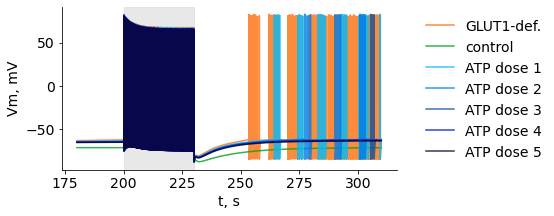

In [14]:
fig, ax = plt.subplots(figsize=(6,3))

ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='g1_61_def'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='g1_61_def'),'VNeu'],color='#fa6f0c',alpha=0.8, label='GLUT1-def.')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='121_default'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='121_default'),'VNeu'],color='#069e1d',alpha=0.8, label='control')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_187_ATP_dose1'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_187_ATP_dose1'),'VNeu'],
         color='#00bbff',alpha=0.8,label='ATP dose 1')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_188_ATP_dose2'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_188_ATP_dose2'),'VNeu'],
         color='#027be6',alpha=0.8,label='ATP dose 2')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_189_ATP_dose3'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_189_ATP_dose3'),'VNeu'],
         color='#0e4ea1',alpha=0.8,label='ATP dose 3')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_190_ATP_dose4'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_190_ATP_dose4'),'VNeu'],
         color='#040fdb',alpha=0.8,label='ATP dose 4')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_191_ATP_dose5'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_191_ATP_dose5'),'VNeu'],
         color='#0a022b',alpha=0.8,label='ATP dose 5')


ax.set_xlabel("t, s")
ax.set_ylabel("Vm, mV")

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


#add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)


plt.show()

if savefigures == True:
    fig.savefig(outpath + "Vm_ATPdoses_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "Vm_ATPdoses_" + timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


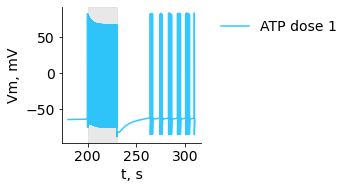

In [15]:
fig, ax = plt.subplots(figsize=(2.5,2.5))

ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_187_ATP_dose1'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_187_ATP_dose1'),'VNeu'],
         color='#00bbff',alpha=0.8,label='ATP dose 1')


ax.set_xlabel("t, s")
ax.set_ylabel("Vm, mV")

#add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


plt.show()

if savefigures == True:
    fig.savefig(outpath + "Vm_ATPdose1only_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "Vm_ATPdose1only_" + timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


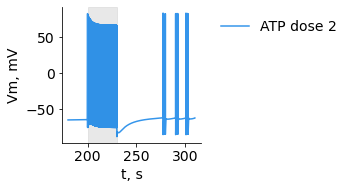

In [16]:
fig, ax = plt.subplots(figsize=(2.5,2.5))

ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_188_ATP_dose2'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_188_ATP_dose2'),'VNeu'],
         color='#027be6',alpha=0.8,label='ATP dose 2')


ax.set_xlabel("t, s")
ax.set_ylabel("Vm, mV")

#add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


plt.show()

if savefigures == True:
    fig.savefig(outpath + "Vm_ATPdose2only_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "Vm_ATPdose2only_" + timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


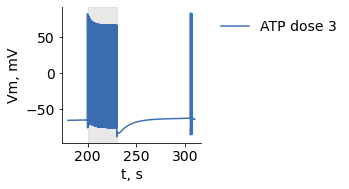

In [17]:
fig, ax = plt.subplots(figsize=(2.5,2.5))

ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_189_ATP_dose3'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_189_ATP_dose3'),'VNeu'],
         color='#0e4ea1',alpha=0.8,label='ATP dose 3')

ax.set_xlabel("t, s")
ax.set_ylabel("Vm, mV")

#add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


plt.show()

if savefigures == True:
    fig.savefig(outpath + "Vm_ATPdose3only_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "Vm_ATPdose3only_" + timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


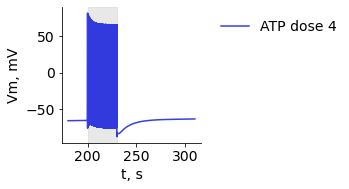

In [18]:
fig, ax = plt.subplots(figsize=(2.5,2.5))

ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_190_ATP_dose4'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_190_ATP_dose4'),'VNeu'],
         color='#040fdb',alpha=0.8,label='ATP dose 4')

ax.set_xlabel("t, s")
ax.set_ylabel("Vm, mV")

#add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


plt.show()

if savefigures == True:
    fig.savefig(outpath + "Vm_ATPdose4only_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "Vm_ATPdose4only_" + timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


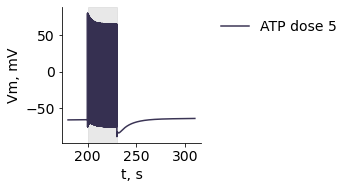

In [19]:
fig, ax = plt.subplots(figsize=(2.5,2.5))

ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_191_ATP_dose5'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_191_ATP_dose5'),'VNeu'],
         color='#0a022b',alpha=0.8,label='ATP dose 5')

ax.set_xlabel("t, s")
ax.set_ylabel("Vm, mV")

#add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


plt.show()

if savefigures == True:
    fig.savefig(outpath + "Vm_ATPdose5only_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "Vm_ATPdose5only_" + timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


### ATP

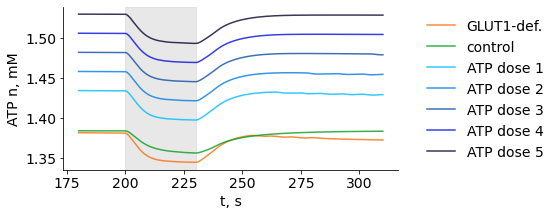

In [20]:
fig, ax = plt.subplots(figsize=(6,3))

ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='g1_61_def'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='g1_61_def'),'ATP_n'],color='#fa6f0c',alpha=0.8, label='GLUT1-def.')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='121_default'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='121_default'),'ATP_n'],color='#069e1d',alpha=0.8, label='control')


ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_187_ATP_dose1'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_187_ATP_dose1'),'ATP_n'],
         color='#00bbff',alpha=0.8,label='ATP dose 1')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_188_ATP_dose2'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_188_ATP_dose2'),'ATP_n'],
         color='#027be6',alpha=0.8,label='ATP dose 2')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_189_ATP_dose3'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_189_ATP_dose3'),'ATP_n'],
         color='#0e4ea1',alpha=0.8,label='ATP dose 3')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_190_ATP_dose4'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_190_ATP_dose4'),'ATP_n'],
         color='#040fdb',alpha=0.8,label='ATP dose 4')

ax.plot(input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_191_ATP_dose5'),'time_s'],input_df.loc[(input_df['time_s']>=180)&(input_df['condition']=='th_191_ATP_dose5'),'ATP_n'],
         color='#0a022b',alpha=0.8,label='ATP dose 5')


ax.set_xlabel("t, s")
ax.set_ylabel("ATP n, mM")

#add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


plt.show()

if savefigures == True:
    fig.savefig(outpath + "ATPn_ATPdoses_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "ATPn_ATPdoses_" + timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")
